# Crime Type Prediction and Crime Occurence Prediction

#### Importing various libraries

In [218]:
import sys
import math
import holidays
import calendar 
import datetime
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import Latex
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from statsmodels.tsa.arima_model import ARIMA
from sklearn.naive_bayes import MultinomialNB
from pandas.tools.plotting import autocorrelation_plot

#### Declaring constants used throughout the code

In [219]:
num_days = 7
num_months = 12
num_time_range = 6
num_n_d = 78
num_years = 6
num_type = 15
num_districts = 7

# Section 1 : Visualizing the dataset
Includes following tasks :
1. Loading the dataset
2. Filtering the dataset
3. Pre processing to obtain necessary columns
4. Mapping year , day , time , area , category and month to a mapping integer

### Loading Denver Dataset

In [220]:
data = pd.read_csv('denver.csv')
data.head(5)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


### Pre-processing the data to get required number of columns

In [221]:
data_d = data.drop([data.columns[0],data.columns[1],data.columns[7],data.columns[9],data.columns[17],data.columns[18]],axis=1)
data_d.head(5)

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID
0,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,6/15/2016 11:31:00 PM,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello
1,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,1/29/2018 5:53:00 PM,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch
2,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/26/2016 9:02:00 PM,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire
3,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,1/30/2018 10:29:00 PM,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro
4,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,6/23/2017 4:09:00 PM,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek


### Finding number of unique values in every column

In [222]:
district_ids = pd.unique(data_d[data_d.columns[9]].values.ravel()).tolist()
len(district_ids)

94405

In [223]:
precinct_ids = pd.unique(data_d[data_d.columns[10]].values.ravel()).tolist()
len(precinct_ids)

7

In [224]:
offence_ids = pd.unique(data_d[data_d.columns[0]].values.ravel()).tolist()
len(offence_ids)

154

In [225]:
code_extensions = pd.unique(data_d[data_d.columns[1]].values.ravel()).tolist()
len(code_extensions)

6

In [226]:
crime_categories = pd.unique(data_d[data_d.columns[3]].values.ravel()).tolist()
len(crime_categories)

15

### Mapping crime type to an integer

In [227]:
all_crimes = data_d[data_d.columns[3]].values

for i in range(len(all_crimes)):

    # Mappping crime type to a numerical representation
    for j in range(len(crime_categories)):
        if(all_crimes[i]==crime_categories[j]):
            all_crimes[i] = j+1
            break
    
data_d['Crime_Type'] = all_crimes
data_d = data_d.drop([data_d.columns[3]], axis=1)
data_d.head(5)

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,Crime_Type
0,5213,0,weapon-unlawful-discharge-of,6/15/2016 11:31:00 PM,6/15/2016 11:31:00 PM,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1
1,2399,0,theft-other,10/11/2017 12:30:00 PM,1/29/2018 5:53:00 PM,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,2
2,2305,0,theft-items-from-vehicle,3/4/2016 8:00:00 PM,4/26/2016 9:02:00 PM,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,3
3,2399,0,theft-other,1/30/2018 7:20:00 PM,1/30/2018 10:29:00 PM,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,2
4,2303,0,theft-shoplift,6/22/2017 8:53:00 PM,6/23/2017 4:09:00 PM,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,2


### Mapping time day month and year of occurence of crime to an integer

In [228]:
# Mapping hour range to its corresponding type for Denver
def conversion(hour,f):
    if(f==1):
        if(hour>=1 and hour<=4):
            return 1
        elif(hour>=5 and hour<=8):
            return 2 
        elif(hour>=9 and hour<=11):
            return 3
        else:
            return 6
    else:
        if(hour==12):
            return 3
        elif(hour>=1 and hour<=4):
            return 4
        elif(hour>=5 and hour<=8):
            return 5
        else:
            return 6

In [229]:
# Formatting date time string to segregate individual values
def convert(x):
    y = ""
    f = 0
    for j in range(len(x)):
        if(x[j]==' ' or x[j]==':'):
            if(x[j+1]=='A' or x[j+1]=='P'):
                if(x[j+1]=='A'):
                    f=1
                break
            else:
                y= y + '/'      
        else:
            y = y + x[j]
    month, day, year , hour , minutes , seconds = (int(t) for t in y.split('/')) 
    return month, day, year , hour , minutes , seconds , f

In [230]:
colorado_holidays = holidays.UnitedStates(state="CO")

In [231]:
# Finding month, hour, day count in dataset for dataset to analyze what is unsafe time period for staying out
months = []
days = []
hours = []
years = []
holidays = []

date = data_d[data_d.columns[3]].values

for i in range(len(date)):
    x = date[i]
    x = str(x)
    
    month, day, year , hour , minutes , seconds , f = convert(x) 
    years.append(year-2013)
    months.append(month)
    ans = datetime.date(year, month, day)
    if(ans in colorado_holidays):
        holidays.append(1)
    else:
        holidays.append(0)
    t = ans.weekday()
    days.append(t+1)
    j = conversion(hour,f)
    hours.append(j)
    
data_d['Crime_Occurence_Month'] = months
data_d['Crime_Occurence_Day'] = days
data_d['Crime_Ocuurence_Time'] = hours
data_d['Crime_Occurence_Year'] = years
data_d['Ocuurence_Holiday'] = holidays

data_d = data_d.drop([data_d.columns[3]], axis=1)
data_d.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,REPORTED_DATE,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,Crime_Type,Crime_Occurence_Month,Crime_Occurence_Day,Crime_Ocuurence_Time,Crime_Occurence_Year,Ocuurence_Holiday
0,5213,0,weapon-unlawful-discharge-of,6/15/2016 11:31:00 PM,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,6,3,6,3,0
1,2399,0,theft-other,1/29/2018 5:53:00 PM,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,2,10,3,3,4,0
2,2305,0,theft-items-from-vehicle,4/26/2016 9:02:00 PM,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,3,3,5,5,3,0
3,2399,0,theft-other,1/30/2018 10:29:00 PM,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,2,1,2,5,5,0
4,2303,0,theft-shoplift,6/23/2017 4:09:00 PM,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,2,6,4,5,4,0


In [232]:
# Finding month, hour, day count in dataset for dataset to analyze what is unsafe time period for staying out
months = []
days = []
hours = []
years = []
holidays = []

date = data_d[data_d.columns[3]].values

for i in range(len(date)):
    x = date[i]
    x = str(x)
    
    month, day, year , hour , minutes , seconds , f = convert(x)  
    years.append(year-2013)
    months.append(month)
    ans = datetime.date(year, month, day)
    if(ans in colorado_holidays):
        holidays.append(1)
    else:
        holidays.append(0)
    t = ans.weekday()
    days.append(t+1)
    j = conversion(hour,f)
    hours.append(j)
    
data_d['Crime_Reported_Month'] = months
data_d['Crime_Reported_Day'] = days
data_d['Crime_Reported_Time'] = hours
data_d['Crime_Reported_Year'] = years
data_d['Reported_Holiday'] = holidays

data_d = data_d.drop([data_d.columns[3]], axis=1)

data_d.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,...,Crime_Occurence_Month,Crime_Occurence_Day,Crime_Ocuurence_Time,Crime_Occurence_Year,Ocuurence_Holiday,Crime_Reported_Month,Crime_Reported_Day,Crime_Reported_Time,Crime_Reported_Year,Reported_Holiday
0,5213,0,weapon-unlawful-discharge-of,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,...,6,3,6,3,0,6,3,6,3,0
1,2399,0,theft-other,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,...,10,3,3,4,0,1,1,5,5,0
2,2305,0,theft-items-from-vehicle,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,...,3,5,5,3,0,4,2,6,3,0
3,2399,0,theft-other,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,...,1,2,5,5,0,1,2,6,5,0
4,2303,0,theft-shoplift,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,...,6,4,5,4,0,6,5,4,4,0


### Mapping neighbourhood areas to an integer

In [233]:
# Loading Demographics Dataset which includes information about neighbourhood areas of denver
demographics = pd.read_csv('demographic.csv')
demographics.head()

,NBHD_ID,NBRHD_NAME,POPULATION_2010,HISPANIC_2010,WHITE_2010,BLACK_2010,NATIVEAM_2010,ASIAN_2010,HAWPACIS_2010,OTHER_2010,...,RENTED_AGE_25_TO_34,RENTED_AGE_35_TO_44,RENTED_AGE_45_TO_54,RENTED_AGE_55_TO_59,RENTED_AGE_60_TO_64,RENTED_AGE_65_TO_74,RENTED_AGE_75_TO_84,RENTED_AGE_85_PLUS,SHAPE_Length,SHAPE_Area
0,32,Hampden,17547.0,2505.0,11750.0,1963.0,64.0,726.0,20.0,38.0,...,1363.0,791.0,700.0,304.0,253.0,285.0,200.0,229.0,0.200466,0.000768
1,3,Baker,4879.0,1664.0,2854.0,144.0,43.0,52.0,10.0,7.0,...,486.0,235.0,231.0,113.0,64.0,82.0,23.0,7.0,0.101767,0.000406
2,70,Washington Park,6905.0,295.0,6356.0,28.0,9.0,119.0,3.0,13.0,...,329.0,132.0,70.0,31.0,36.0,27.0,6.0,21.0,0.090445,0.000411
3,13,Cherry Creek,5589.0,332.0,4896.0,79.0,17.0,168.0,4.0,3.0,...,521.0,261.0,211.0,79.0,92.0,161.0,224.0,207.0,0.063923,0.000228
4,22,Country Club,3001.0,94.0,2740.0,20.0,8.0,77.0,1.0,5.0,...,90.0,55.0,34.0,14.0,17.0,9.0,4.0,2.0,0.052865,0.000177


In [234]:
current = demographics[[demographics.columns[0], demographics.columns[1]]]
current = current.sort_values(by=[current.columns[0]])
n_ref = current[current.columns[1]].values
for i in range(len(n_ref)):
    x = n_ref[i]
    x = str(x)
    x = x.lower()
    y = ""
    f = 1
    for j in range(len(x)):
        if(x[j]=='/' and x[j+1]==' '):
            f=0  
        elif(x[j]==' ' and f==1):
            y = y + '-'
            f = 0
        elif(x[j]==' ' and f==0):
            continue
        elif(x[j]=='-'):
            continue
        else:
            y = y + x[j]
            f = 1
    n_ref[i] = y
current.head(5)

,NBHD_ID,NBRHD_NAME
69,1,athmar-park
59,2,auraria
1,3,baker
72,4,barnum
40,5,barnum-west


In [235]:
ans = []
n_count_d = np.zeros(78)
neighbours = data_d[data_d.columns[9]].values
for i in range(len(neighbours)):
    x = neighbours[i]
    x = str(x)
    for j in range(len(n_ref)):
        if(x==n_ref[j]):
            ans.append(j+1)
            n_count_d[j] = n_count_d[j] + 1
data_d['Neighbourhood_Id'] = ans
data_d = data_d.drop(data_d.columns[10],axis=1)
data_d.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,...,Crime_Occurence_Day,Crime_Ocuurence_Time,Crime_Occurence_Year,Ocuurence_Holiday,Crime_Reported_Month,Crime_Reported_Day,Crime_Reported_Time,Crime_Reported_Year,Reported_Holiday,Neighbourhood_Id
0,5213,0,weapon-unlawful-discharge-of,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,...,3,6,3,0,6,3,6,3,0,45
1,2399,0,theft-other,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,...,3,3,4,0,1,1,5,5,0,28
2,2305,0,theft-items-from-vehicle,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,...,5,5,3,0,4,2,6,3,0,73
3,2399,0,theft-other,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,...,2,5,5,0,1,2,6,5,0,7
4,2303,0,theft-shoplift,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,...,4,5,4,0,6,5,4,4,0,13


In [236]:
offense_data = pd.read_csv('offense_codes.csv')
offense_data.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


In [252]:
offence_codes = pd.unique(offense_data[offense_data.columns[0]].values.ravel()).tolist()
extension_codes = pd.unique(offense_data[offense_data.columns[1]].values.ravel()).tolist()
aggregate_ids = []
for i in range(len(offence_codes)):
    for j in range(len(extension_codes)):
        aggregate_ids.append(str(offence_codes[i]) + str(extension_codes[j]))
offence_codes = offense_data[offense_data.columns[0]].values
extension_codes = offense_data[offense_data.columns[1]].values
aggregate_code = [str(x)+str(y) for x,y in zip(offence_codes,extension_codes)]
agg_id = []
for i in range(len(aggregate_code)):
    for j in range(len(aggregate_ids)):
        if(aggregate_code[i]==aggregate_ids[j]):
            agg_id.append(j+1)
            break
len(aggregate_ids)
# offense_data['Aggregate_Id'] = agg_id
# offense_data.head(5)

1368

In [253]:
offence_codes = pd.unique(data_d[data_d.columns[0]].values.ravel()).tolist()
extension_codes = pd.unique(data_d[data_d.columns[1]].values.ravel()).tolist()
aggregate_ids = []
for i in range(len(offence_codes)):
    for j in range(len(extension_codes)):
        aggregate_ids.append(str(offence_codes[i]) + str(extension_codes[j]))
offence_codes = data_d[data_d.columns[0]].values
extension_codes = data_d[data_d.columns[1]].values
aggregate_code = [str(x)+str(y) for x,y in zip(offence_codes,extension_codes)]
agg_id = []
for i in range(len(aggregate_code)):
    for j in range(len(aggregate_ids)):
        if(aggregate_code[i]==aggregate_ids[j]):
            agg_id.append(j+1)
            break
len(aggregate_ids)
# data_d['Aggregate_Id'] = agg_id
# data_d.head(5)

924

In [251]:
offence_codes = data_d[data_d.columns[0]].values
extension_codes = data_d[data_d.columns[1]].values
aggregate_code = [str(x)+str(y) for x,y in zip(offence_codes,extension_codes)]
agg_id = []
for i in range(len(aggregate_code)):
    for j in range(len(aggregate_ids)):
        if(aggregate_code[i]==aggregate_ids[j]):
            agg_id.append(j+1)
            break
        
len(agg_id)
# data_d['Aggregate_Id'] = agg_id
# data_d = data_d.drop([data_d.columns[0],data_d.columns[1]],axis=1)
# data_d.head(5)

504761

In [129]:
def prob(a):
    s = sum(a)
    return [(x/s) for x in a]

def get_percentage(a):
    a = prob(a)
    return [x*100 for x in a]

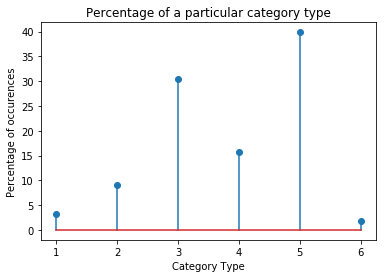

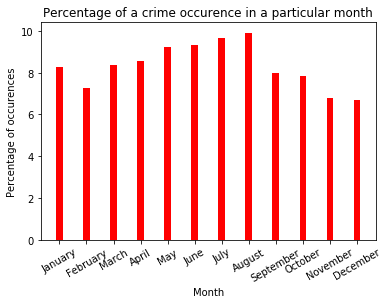

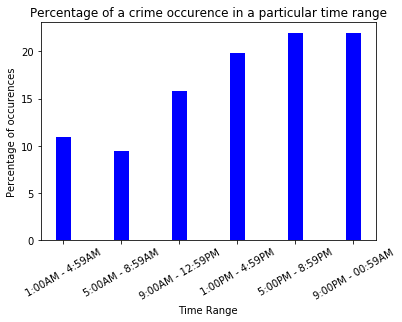

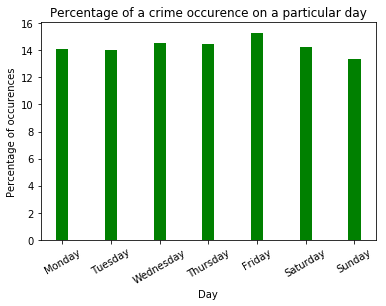

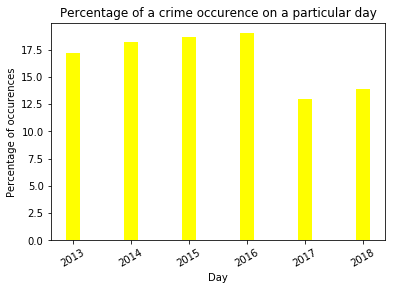

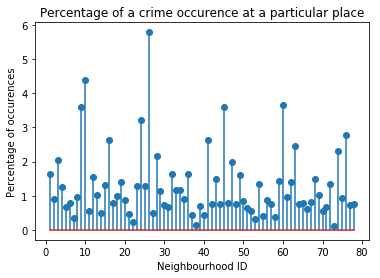

In [130]:
def graph():
    plt.ylabel('Percentage of occurences')
    plt.show()

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
time_range = ['1:00AM - 4:59AM','5:00AM - 8:59AM','9:00AM - 12:59PM','1:00PM - 4:59PM','5:00PM - 8:59PM','9:00PM - 00:59AM']
years = ['2013','2014','2015','2016','2017','2018']

m_per_d = get_percentage(m_count_d)
n_per_d = get_percentage(n_count_d)
d_per_d = get_percentage(d_count_d)
h_per_d = get_percentage(h_count_d)
y_per_d = get_percentage(y_count_d)
c_per_d = get_percentage(c_count_d)

plt.stem(np.arange(len(c_per_d))+1,c_per_d)
plt.xlabel('Category Type')
plt.title('Percentage of a particular category type')
graph()

bar_width = 0.5
plt.bar((np.arange(len(m_per_d))+1)*2,m_per_d,bar_width,color='red',label='Denver')
plt.xticks((np.arange(len(months))+1)*2,months, fontsize=10,rotation=30)
plt.xlabel('Month')
plt.title('Percentage of a crime occurence in a particular month')
graph()

plt.bar((np.arange(len(h_per_d))+1)*2,h_per_d,bar_width,color='blue',label='Denver')
plt.xticks((np.arange(len(time_range))+1)*2,time_range, fontsize=10,rotation=30)
plt.xlabel('Time Range')
plt.title('Percentage of a crime occurence in a particular time range')
graph()

plt.bar((np.arange(len(d_per_d))+1)*2,d_per_d,bar_width,color='green',label='Denver')
plt.xticks((np.arange(len(days))+1)*2,days, fontsize=10,rotation=30)
plt.xlabel('Day')
plt.title('Percentage of a crime occurence on a particular day')
graph()

plt.bar((np.arange(len(y_per_d))+1)*2,y_per_d,bar_width,color='yellow',label='Denver')
plt.xticks((np.arange(len(years))+1)*2,years, fontsize=10,rotation=30)
plt.xlabel('Day')
plt.title('Percentage of a crime occurence on a particular day')
graph()

plt.stem(np.arange(len(n_per_d))+1,n_per_d)
plt.xlabel('Neighbourhood ID')
plt.title('Percentage of a crime occurence at a particular place')
graph()

Inferences from graph :
We can infer from graphs that :
1. Overall occurence of Crime Type 5 is the most.
2. Overall occurence of Crime in August is the most and the least in December.
3. Overall occurence of Crime on Friday is the most and the least on Sunday.
4. Overall occurence of crime in time duration 5 PM to 00:59 AM that is evening and night is the most.

In [131]:
district = data_d[data_d.columns[2]].values
types = data_d[data_d.columns[3]].values
months = data_d[data_d.columns[4]].values
days = data_d[data_d.columns[5]].values
times = data_d[data_d.columns[6]].values
years = data_d[data_d.columns[7]].values
neighbours = data_d[data_d.columns[8]].values

Storing various values for furture use

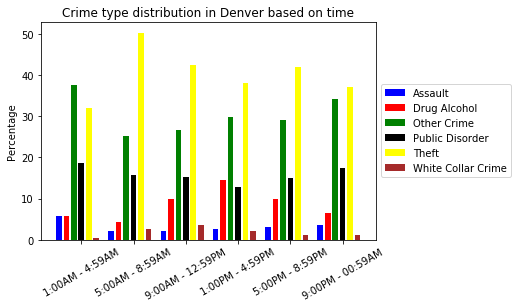

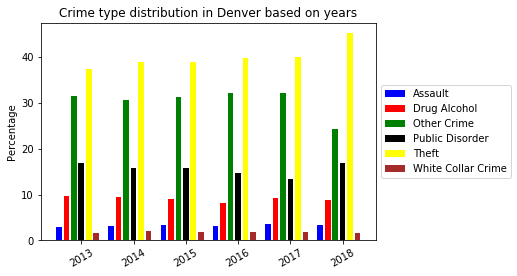

In [132]:
def find_type_prob(a,b):
    for i in range(b):
        s = 0
        for j in range(6):
            s = s + a[i][j]
        for j in range(6):
            a[i][j] = a[i][j] / s
    return a

def type_graph(day_type,b,c):
    day_type = np.transpose(find_type_prob(day_type,b) * 100)
    bar_width = 0.75 
    plt.bar((np.arange(len(day_type[0]))*7),day_type[0],bar_width,color='blue',label='Assault')
    plt.bar(((np.arange(len(day_type[1]))*7)+1),day_type[1],bar_width,color='red',label='Drug Alcohol')
    plt.bar(((np.arange(len(day_type[2]))*7)+2),day_type[2],bar_width,color='green',label='Other Crime')
    plt.bar(((np.arange(len(day_type[3]))*7)+3),day_type[3],bar_width,color='black',label='Public Disorder')
    plt.bar(((np.arange(len(day_type[4]))*7)+4),day_type[4],bar_width,color='yellow',label='Theft')
    plt.bar(((np.arange(len(day_type[5]))*7)+5),day_type[5],bar_width,color='brown',label='White Collar Crime')
    plt.xticks((np.arange(len(day_type[0]))*7)+3,c, fontsize=10, rotation=30)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('Percentage')
    plt.show()

time_type = np.zeros((6,6))

for i in range(len(times)):
    b = times[i] - 1
    a = types[i] - 1
    time_type[b][a] = time_type[b][a] + 1 
    
a = ['1:00AM - 4:59AM','5:00AM - 8:59AM','9:00AM - 12:59PM','1:00PM - 4:59PM','5:00PM - 8:59PM','9:00PM - 00:59AM']
plt.title('Crime type distribution in Denver based on time')
type_graph(time_type,6,a)

year_type = np.zeros((6,6))

for i in range(len(years)):
    year_type[years[i]-1][types[i]-1] = year_type[years[i]-1][types[i]-1] + 1
    
plt.title('Crime type distribution in Denver based on years')
type_graph(year_type,6,['2013','2014','2015','2016','2017','2018'])

Inference from graph
1. We can observe that in almost 5 time ranges occurence of theft is the most and there is least or negligibble occurence of assault and white collar crime
2. We can observe that in a particular year occurence of theft and other type of crimes (once not classified into any categories is the most)

# Section 2 : Crime Type Prediction

### Predicting crime type on the basis of given features : month , time , day , year and area using Naive Bayes Algorithm

Reasons to apply Naive Bayes model :
We had to predict that if we have spatial and temporal details of occurence of crime that is the place it occured at and the time at which the crime occured; then what is the crime type that is which category the crime belongs to.

Taking simple example of following tuples :
1. {Gateway Green Valley Ranch , 11th October 2017 , 12: 30 PM} => {Larceny that is theft occured}

Taking probable occurences of all the features seperated :
1. {Gateway Green Valley Ranch} => {Theft}
2. {October} => {Theft}
3. {2017} => {Theft}
4. {12:30 PM} => {Theft}
5. {Wednesday} => {Theft}

Hence forming such independent occurences and calculating combined conditional probability; we can find the predicted crime type.

Symbols used :
1. Month = m
2. Time = t
3. Area = a
4. Day = d
5. Year = y 
6. Type = c

Formula (By using chain rule for finding conditional probability)
    \begin{eqnarray}
    P(c|m,y,a,t,d) = \frac{p(m|c,y,a,t,d) * p(y|c,a,t,d) * p(a|c,t,d) * p(t|d,c) * p(d|c) * p(c)} {p(m|y,a,t,d) * p(y|a,t,d) * p(a|t,d) * p(t|d)}
    \end{eqnarray}

In [133]:
# y = a*b*c*d*e*f / g*h*i*j

set1 = data_d.iloc[0:72463]
set2 = data_d.iloc[72463:144926]
set3 = data_d.iloc[144926:217389]
set4 = data_d.iloc[217389:289852]
set5 = data_d.iloc[289852:]

num_days = 7
num_months = 12
num_time_range = 6
num_n_d = 78
num_years = 6
num_type = 6

def find_vals(train):
    return train[train.columns[2]].values, train[train.columns[3]].values, train[train.columns[4]].values, train[train.columns[5]].values, train[train.columns[6]].values, train[train.columns[7]].values 

def model(train,test):
    district_r, types_r, months_r, days_r, times_r, years_r = find_vals(train)
    district_t, types_t, months_t, days_t, times_t, years_t = find_vals(train)
    
    # Calculating p(c)
    f = np.zeros(num_type)
    for i in range(len(types_r)):
        f[types_r[i]-1] = f[types_r[i]-1] + 1
    f = prob(f)
    
    # calculating p(d|c)
    # row is c and column is d
    e = np.zeros((num_type,num_days))
    s = np.zeros(num_type)
    for i in range(len(days_r)):
        e[types_r[i]-1][days_r[i]-1] = e[types_r[i]-1][days_r[i]-1] + 1
        s[types_r[i]-1] = s[types_r[i]-1] + 1  
    for i in range(num_type):
        for j in range(num_type):
            e [i][j] = e[i][j] / s[i]
    
    # calculating p(t|d,c)
    # first is day_type then category_type and then time_range
    d = np.zeros((num_days,num_type,num_time_range))
    s = np.zeros((num_days,num_type))
    for i in range(len(times_r)):
        d[days_r[i]-1][types_r[i]-1][times_r[i]-1] = d[days_r[i]-1][types_r[i]-1][times_r[i]-1] + 1
        s[days_r[i]-1][types_r[i]-1] = s[days_r[i]-1][types_r[i]-1] + 1
    for i in range(num_days):
        for j in range(num_type):
            for k in range(num_time_range):
                d[i][j][k] = d[i][j][k] / s[i][j]
       
    # calculating p(a|t,d,c)
    # first is time_range then day_type then category_type and at last district_type
    c = np.zeros((num_time_range,num_days,num_type,num_districts))
    s = np.zeros((num_time_range,num_days,num_type))
    for i in range(len(district_r)):
        c[times_r[i]-1][days_r[i]-1][types_r[i]-1][district_r[i]-1] = c[times_r[i]-1][days_r[i]-1][types_r[i]-1][district_r[i]-1] + 1
        s[times_r[i]-1][days_r[i]-1][types_r[i]-1] = s[times_r[i]-1][days_r[i]-1][types_r[i]-1] + 1
    for i in range(num_time_range):
        for j in range(num_days):
            for k in range(num_type):
                for l in range(num_districts):
                    c[i][j][k][l] = c[i][j][k][l] / s[i][j][k]
    
    # calculating p(y|a,t,d,c)
    b = np.zeros((num_districts,num_time_range,num_days,num_type,num_years))
    s = np.zeros((num_districts,num_time_range,num_days,num_type))
    for i in range(len(years_r)):
        b[district_r[i]-1][times_r[i]-1][days_r[i]-1][types_r[i]-1][years_r[i]-1] = b[district_r[i]-1][times_r[i]-1][days_r[i]-1][types_r[i]-1][years_r[i]-1] + 1
        s[district_r[i]-1][times_r[i]-1][days_r[i]-1][types_r[i]-1] = s[district_r[i]-1][times_r[i]-1][days_r[i]-1][types_r[i]-1] + 1
    for i in range(num_districts):
        for j in range(num_time_range):
            for k in range(num_days):
                for l in range(num_type):
                    if s[i][j][k][l]!=0:
                        for m in range(num_years):
                            b[i][j][k][l][m] = b[i][j][k][l][m] / s[i][j][k][l]
    
    
    # calculating p(m|y,a,t,d,c)
    a = np.zeros((num_years,num_districts,num_time_range,num_days,num_type,num_months))
    s = np.zeros((num_years,num_districts,num_time_range,num_days,num_type))
    for i in range(len(months_r)):
        a[years_r[i]-1][district_r[i]-1][times_r[i]-1][days_r[i]-1][types_r[i]-1][months_r[i]-1] = a[years_r[i]-1][district_r[i]-1][times_r[i]-1][days_r[i]-1][types_r[i]-1][months_r[i]-1] + 1
        s[years_r[i]-1][district_r[i]-1][times_r[i]-1][days_r[i]-1][types_r[i]-1] = s[years_r[i]-1][district_r[i]-1][times_r[i]-1][days_r[i]-1][types_r[i]-1] + 1
    for i in range(num_years):
        for j in range(num_districts):
            for k in range(num_time_range):
                for l in range(num_days):
                    for m in range(num_type):
                        if(s[i][j][k][l][m]!=0):
                            for n in range(num_months):
                                a[i][j][k][l][m][n] = a[i][j][k][l][m][n] / s[i][j][k][l][m]  
    
    g = np.zeros(())
    h = np.zeros(())
    i = np.zeros(())
    j = np.zeros(())
    
model(set1,set2)

In [134]:
# models
def bayesian_formula(a,b,c):
    for i in range(6):
        for j in range(c):
            a[i][j] = a[i][j] * b[i]
    return a

def type_prob(a,b):
    for i in range(6):
        s = np.sum(a[i])
        for j in range(b):
            a[i][j] = a[i][j] / s
    return a

def find_matrix(a,b,c,d):
    t = np.zeros((d,6))
    for i in range(len(a)):
        t[a[i]-1][b[i]-1] = t[a[i]-1][b[i]-1] + 1
    t = np.transpose(t)
    t = type_prob(t,d)
    t = bayesian_formula(t,c,d)
    return t

def count(a,b):
    ty = np.zeros(b)
    for i in range(len(a)):
        ty[int(a[i])-1] = ty[int(a[i])-1] + 1
    return ty

def correlation_coefficient(a,b):
    s = 0
    s_a = 0
    s_b = 0
    t_a = 0
    t_b = 0
    for i in range(len(a)):
        s = s + a[i]*b[i]
        s_a = s_a + a[i]
        s_b = s_b + b[i]
        t_a = t_a + (a[i]*a[i])
        t_b = t_b + (b[i]*b[i])
    num = s*len(a) - (s_a*s_b) 
    g = t_a*len(a) - s_a*s_a
    h = t_b*len(b) - s_b*s_b
    den = math.sqrt(g) * math.sqrt(h)
    return round(num/den,2)

def calculate_accuracy(t,y_out):
    c =0 
    for i in range(len(t)):
        if(t[i]==y_out[i]):
            c = c + 1
    return round(c/len(t),2)

def find_ans(train_d,test_d):
    
    train_m_d = train_d[train_d.columns[4]].values
    train_n_d = train_d[train_d.columns[8]].values
    train_c_d = train_d[train_d.columns[3]].values
    train_d_d = train_d[train_d.columns[5]].values
    train_t_d = train_d[train_d.columns[6]].values
    train_y_d = train_d[train_d.columns[7]].values
    test_m_d = test_d[test_d.columns[4]].values
    test_n_d = test_d[test_d.columns[8]].values
    test_c_d = test_d[test_d.columns[3]].values
    test_d_d = test_d[test_d.columns[5]].values
    test_t_d = test_d[test_d.columns[6]].values
    test_y_d = test_d[test_d.columns[7]].values
        
    prob_m_d = prob(count(train_m_d,12))
    prob_n_d = prob(count(train_n_d,78))
    prob_c_d = prob(count(train_c_d,6))
    prob_d_d = prob(count(train_d_d,7))
    prob_t_d = prob(count(train_t_d,6))
    prob_y_d = prob(count(train_y_d,6))
    
    month_type_d = find_matrix(train_m_d,train_c_d,prob_c_d,12)
    day_type_d = find_matrix(train_d_d,train_c_d,prob_c_d,7)
    time_type_d = find_matrix(train_t_d,train_c_d,prob_c_d,6)
    n_type_d = find_matrix(train_n_d,train_c_d,prob_c_d,78)
    y_type_d = find_matrix(train_y_d,train_c_d,prob_c_d,6)
    
    c_m = correlation_coefficient(train_m_d,train_c_d)
    c_n = correlation_coefficient(train_n_d,train_c_d)
    c_t = correlation_coefficient(train_t_d,train_c_d)
    c_d = correlation_coefficient(train_d_d,train_c_d)
    c_y = correlation_coefficient(train_y_d,train_c_d)
    
    c = np.zeros(6)
    test_results = []
    for i in range(len(test_m_d)):
        maxi = 0
        for j in range(6):
            k = month_type_d[j][test_m_d[i]-1]*time_type_d[j][test_t_d[i]-1]*day_type_d[j][test_d_d[i]-1]*n_type_d[j][test_n_d[i]-1]
            if(maxi<k):
                maxi = k
                ans = j+1
        test_results.append(ans)
        c[ans-1] = c[ans-1] + 1
        
    return  calculate_accuracy(test_results,test_c_d)


def input_output(train_d,test_d):
    x_in = train_d.iloc[:,4:].as_matrix(columns=None)
    y_in = train_d.iloc[:,3].values
    y_in = y_in.astype('int')
    x_out = test_d.iloc[:,4:].as_matrix(columns=None)
    y_out = test_d.iloc[:,3].values
    y_out = y_out.astype('int')
    return x_in,y_in,x_out,y_out

def inbuilt1(train_d,test_d):

    x_in,y_in,x_out,y_out = input_output(train_d,test_d)
    
    clf = MultinomialNB()
    clf.fit(x_in,y_in)
    t = clf.predict(x_out)

    return calculate_accuracy(t,y_out)

def inbuilt2(train_d,test_d):
    
    x_in,y_in,x_out,y_out = input_output(train_d,test_d)
    
    clf = GaussianNB()
    clf.fit(x_in,y_in)
    t = clf.predict(x_out)

    return calculate_accuracy(t,y_out)

def inbuilt3(train_d,test_d):

    x_in,y_in,x_out,y_out = input_output(train_d,test_d)
    
    clf = BernoulliNB()
    clf.fit(x_in,y_in)
    t = clf.predict(x_out)

    return calculate_accuracy(t,y_out)

In [135]:
set1 = data_d.iloc[0:72463]
set2 = data_d.iloc[72463:144926]
set3 = data_d.iloc[144926:217389]
set4 = data_d.iloc[217389:289852]
set5 = data_d.iloc[289852:]

ans = []
inbuilt1_ans = []
inbuilt2_ans = []
inbuilt3_ans = []

def find(a,b,c,d,e):
    return pd.concat([a,b,c,d]) , e

train_d , test_d = find(set1 , set2 , set3 ,set4 , set5)
ans.append(find_ans(train_d,test_d))
inbuilt1_ans.append(inbuilt1(train_d,test_d))
inbuilt2_ans.append(inbuilt2(train_d,test_d))
inbuilt3_ans.append(inbuilt3(train_d,test_d))

train_d , test_d = find(set5 , set2 , set3 ,set4 , set1)
ans.append(find_ans(train_d,test_d))
inbuilt1_ans.append(inbuilt1(train_d,test_d))
inbuilt2_ans.append(inbuilt2(train_d,test_d))
inbuilt3_ans.append(inbuilt3(train_d,test_d))

train_d , test_d = find(set5 , set1 , set3 ,set4 , set2)
ans.append(find_ans(train_d,test_d))
inbuilt1_ans.append(inbuilt1(train_d,test_d))
inbuilt2_ans.append(inbuilt2(train_d,test_d))
inbuilt3_ans.append(inbuilt3(train_d,test_d))

train_d , test_d = find(set5 , set1 , set2 ,set4 , set3)
ans.append(find_ans(train_d,test_d))
inbuilt1_ans.append(inbuilt1(train_d,test_d))
inbuilt2_ans.append(inbuilt2(train_d,test_d))
inbuilt3_ans.append(inbuilt3(train_d,test_d))

train_d ,test_d = find(set5 , set1 , set3 ,set2 , set4)
ans.append(find_ans(train_d,test_d))
inbuilt1_ans.append(inbuilt1(train_d,test_d))
inbuilt2_ans.append(inbuilt2(train_d,test_d))
inbuilt3_ans.append(inbuilt3(train_d,test_d))

round(np.mean(ans),2) , round(np.mean(inbuilt1_ans),2) , round(np.mean(inbuilt2_ans),2) , round(np.mean(inbuilt3_ans),2)

(0.42, 0.35, 0.4, 0.4)

Inferences :
1. On applying Naives Bayes model which I created from scratch; accuracy is found to be highest (although it is 41% only) compared to inbuilt Gaussian , Multinomial and Bernoulli Naive Bayes Model

Probable reasons for such an inferences :
1. To state an answer to this inference we need to dig into the working of Gaussian , Multinomial and Bernoulli algorithms
    1. GaussianNB Algortithm works when data is generated in a Gaussian manner.
    2. MultinomialNB Algorithm works when features are fed in as frequencies.
    3. BernouilleNB suits for independent features working and hence best suits the approcah with which I worked.

Drawbacks :
The drawback in applying this algorithm lies with the basic drawback of algorithm that features cannot be considered totally independent of each other and dependence on each of the events is not equally likely as for a given set of features : decision of time at which crime occured should have major role to play rather than influence of the year in which crime occured. Moreover skewing of data given to more towards the occurence of theft crime types trains the model in a biased way.

# Section 3 : Predicting crime occurence

### Extrapolation of time series of predicting number of crimes in future

In [136]:
c = np.zeros((12,6))
for j in range(12):
    for i in range(len(months)):
        if(months[i]==j+1):
            c[j][years[i]-1] = c[j][years[i]-1] + 1
c = np.transpose(c)

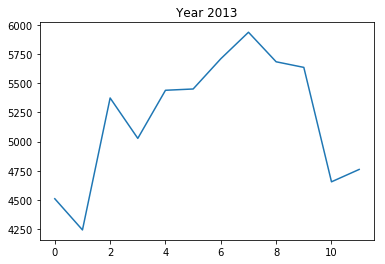

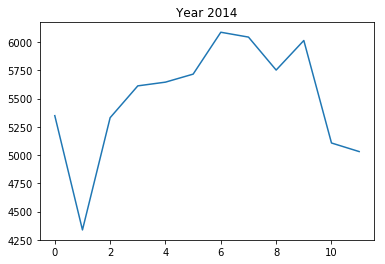

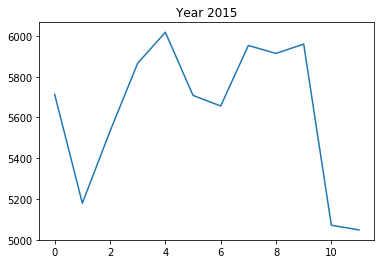

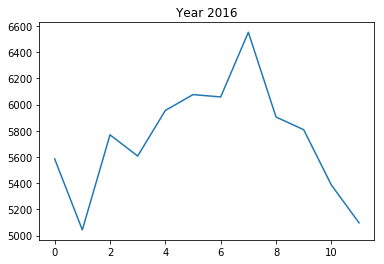

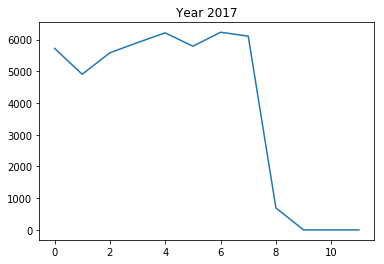

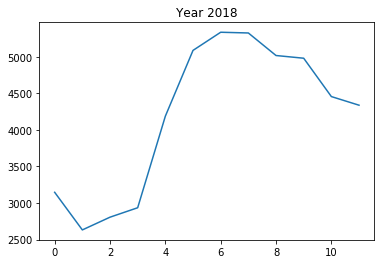

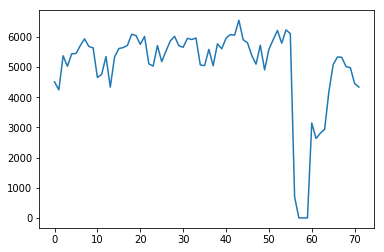

In [137]:
for i in range(6):
    plt.plot(c[i][:])
    plt.title('Year '+ str(i+2013))
    plt.show()
plt.plot(c.flatten())
plt.show()

Time Series Plots :
1. The first 6 graphs show the trend of number of crimes during the span of year.
2. The last graph shows number of crimes occured during every month, year pair that is combining all the above graphs.
3. We can observe that in year 2013, 2014 , 2016 and 2017 maximum crime occurs during 3rd quater of the year.
4. We can observe that in year 2015 and 2018 maximum crime occurs during 2nd quater of the year.

#### Calculating Rolling Mean

In [138]:
def add_months(sourcedate,months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day,calendar.monthrange(year,month)[1])
    return datetime.date(year,month,day)

t = c.flatten()
ans = datetime.date(2013, 1,1)
table = pd.DataFrame(columns=['Date','Value'])
for i in range(len(t)):
    table.loc[i] = [ans,t[i]]
    ans = add_months(ans,1)
table['Date'] = pd.to_datetime(table['Date'],infer_datetime_format=True)
indexedDataset = table.set_index(['Date'])

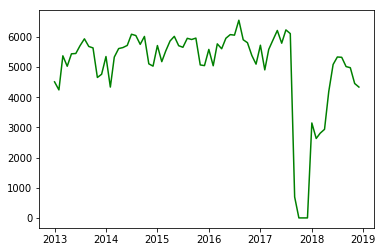

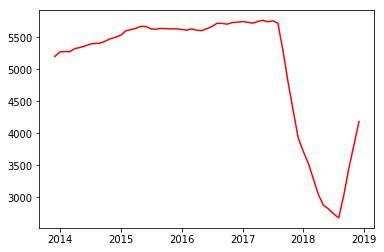

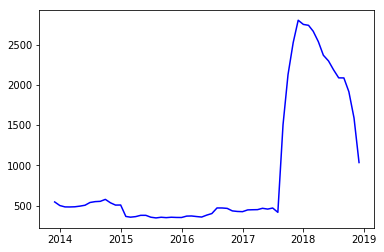

In [139]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()

plt.plot(indexedDataset['Value'],color='green')
plt.show()
plt.plot(rolmean,color='red')
plt.show()
plt.plot(rolstd,color='blue')
plt.show()

Inferences
1. We observe that rolling mean drastically changes during the 3rd and 4th quarter of time line series.
2. Moereover the value of rolling mean lies between 2000 to 6000 range.
3. We observe a sudden decrease in crime at the end of year 2017 and beginning of the year 2018.
4. Standard deviation drastically changes at the end of year 2017. This is observed because of sudden change in data values to 0 in that time period.

We can infer from above graphs that some kind of anomaly was observed in noting the crimes and storing their values.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


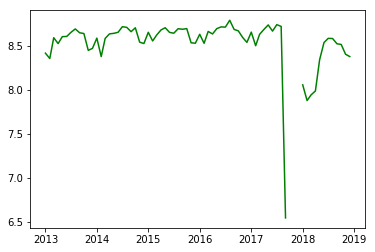

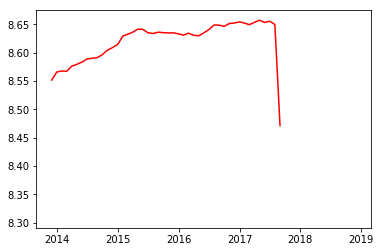

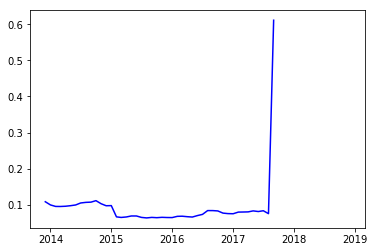

In [140]:
indexedDataset_log = np.log(indexedDataset)

rolmean = indexedDataset_log.rolling(window=12).mean()
rolstd = indexedDataset_log.rolling(window=12).std()

plt.plot(indexedDataset_log['Value'],color='green')
plt.show()
plt.plot(rolmean,color='red')
plt.show()
plt.plot(rolstd,color='blue')
plt.show()

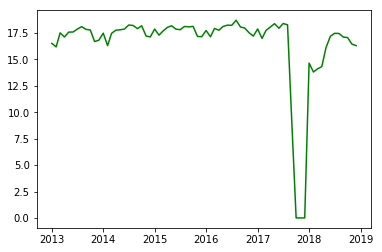

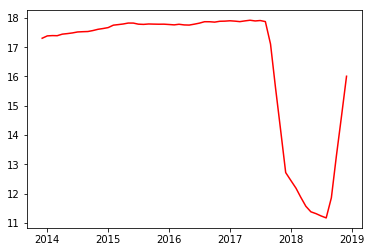

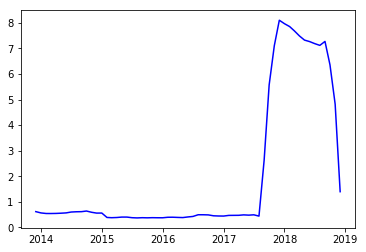

In [141]:
indexedDataset_cbrt = np.cbrt(indexedDataset)

rolmean = indexedDataset_cbrt.rolling(window=12).mean()
rolstd = indexedDataset_cbrt.rolling(window=12).std()

plt.plot(indexedDataset_cbrt['Value'],color='green')
plt.show()
plt.plot(rolmean,color='red')
plt.show()
plt.plot(rolstd,color='blue')
plt.show()

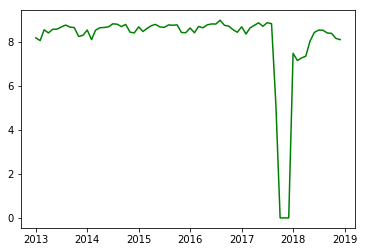

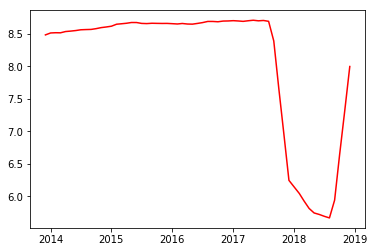

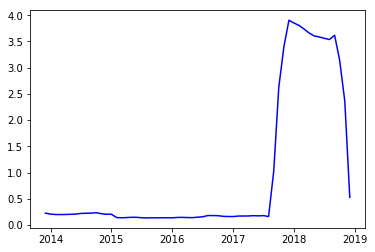

In [142]:
indexedDataset_pow = np.power(indexedDataset,1/4)

rolmean = indexedDataset_pow.rolling(window=12).mean()
rolstd = indexedDataset_pow.rolling(window=12).std()

plt.plot(indexedDataset_pow['Value'],color='green')
plt.show()
plt.plot(rolmean,color='red')
plt.show()
plt.plot(rolstd,color='blue')
plt.show()

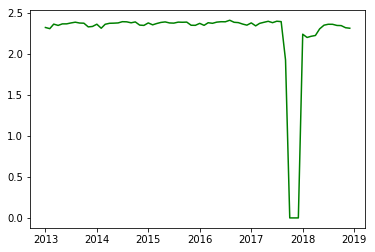

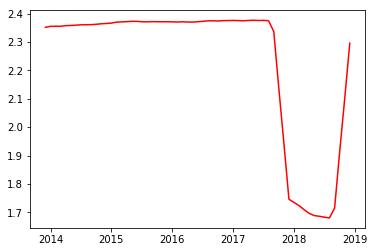

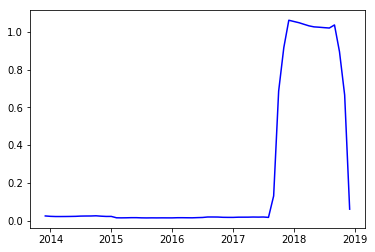

In [143]:
indexedDataset_pow = np.power(indexedDataset,1/10)

rolmean = indexedDataset_pow.rolling(window=12).mean()
rolstd = indexedDataset_pow.rolling(window=12).std()

plt.plot(indexedDataset_pow['Value'],color='green')
plt.show()
plt.plot(rolmean,color='red')
plt.show()
plt.plot(rolstd,color='blue')
plt.show()

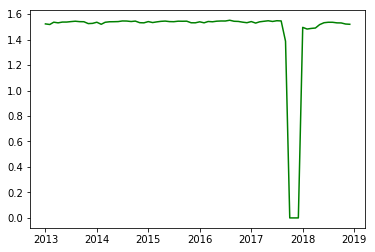

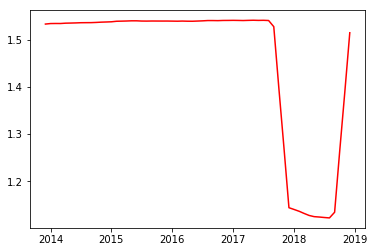

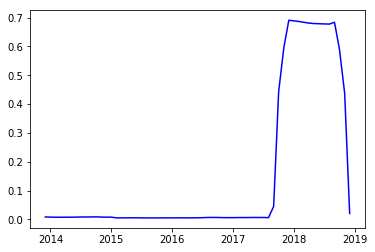

In [144]:
indexedDataset_pow = np.power(indexedDataset,1/20)

rolmean = indexedDataset_pow.rolling(window=12).mean()
rolstd = indexedDataset_pow.rolling(window=12).std()

plt.plot(indexedDataset_pow['Value'],color='green')
plt.show()
plt.plot(rolmean,color='red')
plt.show()
plt.plot(rolstd,color='blue')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


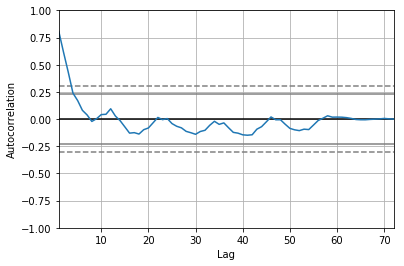

In [145]:
autocorrelation_plot(indexedDataset)
plt.show()

Knowing the autocorrelation values :
1. We find that values observes are mostly negative and sometimes tend to go to 0. As observed in the last part of the data plot

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   71
Model:                ARIMA(10, 1, 0)   Log Likelihood                -570.799
Method:                       css-mle   S.D. of innovations            738.929
Date:                Thu, 04 Oct 2018   AIC                           1165.598
Time:                        17:53:47   BIC                           1192.750
Sample:                    02-01-2013   HQIC                          1176.396
                         - 12-01-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.6064     48.207     -0.241      0.811    -106.091      82.878
ar.L1.D.Value      0.0998      0.118      0.846      0.401      -0.131       0.331
ar.L2.D.Value     -0.1762      0.120

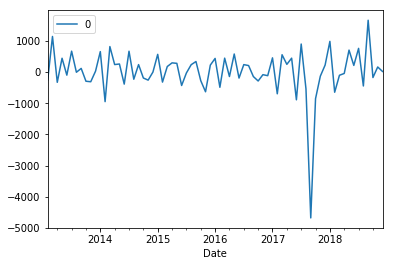

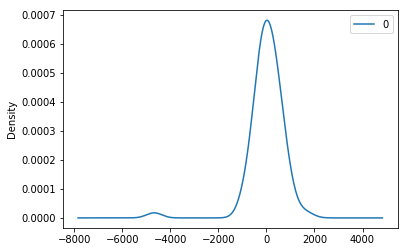

                 0
count    71.000000
mean     12.702564
std     749.465718
min   -4675.955420
25%    -268.413779
50%      18.830736
75%     386.364753
max    1659.735351


In [146]:
model = ARIMA(indexedDataset, order=(10,1,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())